In [17]:
import EoN
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt
import random

%matplotlib inline

In [27]:
N = 10000
G = nx.fast_gnp_random_graph(N, 5./(N-1))

#they will vary in the rate of leaving exposed class.
#and edges will vary in transition rate.
#there is no variation in recovery rate.

node_attribute_dict = {node: 0.5+random.random() for node in G.nodes()}
edge_attribute_dict = {edge: 0.5+random.random() for edge in G.edges()}

In [28]:
nx.set_node_attributes(G, values=node_attribute_dict, name='expose2infect_weight')
nx.set_edge_attributes(G, values=edge_attribute_dict, name='transmission_weight')

In [29]:
#These individual and partnership attributes will be used to scale
#the transition rates.  When we define `H` and `J`, we provide the name
#of these attributes.


#We show how node and edge attributes in the contact network 'G' can be used
#to scale the transmission rates.  More advanced techniques are shown in
#other examples.
H = nx.DiGraph()
H.add_node('S') #This line is actually unnecessary since 'S' does not change status intrinsically
#
H.add_edge('E', 'I', rate = 0.6, weight_label='expose2infect_weight')
#  The line above states that the transition from 'E' to 'I' occurs with rate
#  0.6  times  whatever value is in the individual's attribute 'expose2infect_weight'
#
H.add_edge('I', 'R', rate = 0.1)
#  The line above states that the I to 'R' transition occurs with rate 0.1
#  and does not depend on any attribute

In [30]:
J = nx.DiGraph()
J.add_edge(('I', 'S'), ('I', 'E'), rate = 0.1, weight_label='transmission_weight')
#  The line above states that an 'I' individual will cause an 'S' individual
#  to transition to 'E' with rate equal to 0.1 times the partnership's attribute
#  'transmission_weight'.

In [31]:
IC = defaultdict(lambda: 'S')
for node in range(200):
    IC[node] = 'I'

In [32]:
return_statuses = ('S', 'E', 'I', 'R')

# t, S, E, I, R = EoN.Gillespie_simple_contagion(
res = EoN.Gillespie_simple_contagion(
                    G,                           # Contact network.
                    H,                           # Spontaneous transitions (without any nbr influence).
                    J,                           # Neighbor induced transitions.
                    IC,                          # Initial infected nodes
                    return_statuses,             # 
                    return_full_data = True,
                    tmax = float('Inf')          # Contact network
                )

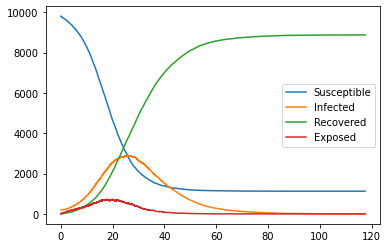

In [33]:
plt.plot(res.t(), res.S(), label = 'Susceptible')
plt.plot(res.t(), res.I(), label = 'Infected')
plt.plot(res.t(), res.R(), label = 'Recovered')
plt.plot(res.t(), N - (res.S() + res.I() + res.R()), label = 'Exposed')
plt.legend();

# plt.savefig('SEIR.png')

In [37]:
res.summary()

(array([0.00000000e+00, 4.13237375e-03, 9.53350860e-03, ...,
        1.07664372e+02, 1.11634018e+02, 1.17507628e+02]),
 {'S': array([9800, 9799, 9798, ..., 1127, 1127, 1127]),
  'E': array([0, 1, 2, ..., 0, 0, 0]),
  'I': array([200, 200, 200, ...,   2,   1,   0]),
  'R': array([   0,    0,    0, ..., 8871, 8872, 8873])})